# SUPERVISED MACHINE LEARNING - Linear Regression

# Problem Statement:
In this regression, the percentage of marks is predicted based on the number of hours, the student studies.

Predicting the score of students, who study for 9.25 hours. 


# Importing libraries

In [22]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Importing the data from remote link

In [23]:
url = "http://bit.ly/w-data"
stud_data = pd.read_csv(url)
stud_data.head

<bound method NDFrame.head of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

# Structure of the data

In [24]:
stud_data.shape

(25, 2)

# Statistical description about the data

In [25]:
stud_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Plotting the distribution of scores

In [26]:
sns.set_style('whitegrid') #to view grids in the graph

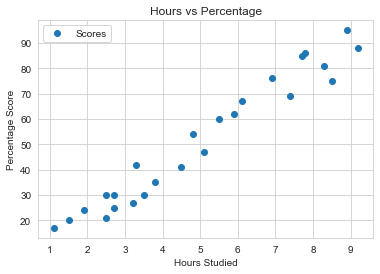

In [27]:
stud_data.plot(x = 'Hours', y = 'Scores', style = 'o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Preparing and Splitting the data into train & test

In [28]:
x = stud_data.iloc[:, :-1].values  
y = stud_data.iloc[:, 1].values  

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    train_size=0.7)

# Training the Model

In [30]:
from sklearn.linear_model import LinearRegression  

regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Model Training is completed.")

Model Training is completed.


In [31]:
x_train.shape

(17, 1)

In [32]:
y_train.shape

(17,)

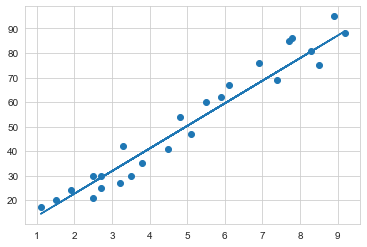

In [33]:
# Plotting the regression line
line = regressor.coef_ * x + regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# Predicting the scores based on the test hours

In [34]:
# Testing data - In Hours
print(x_test)

[[7.8]
 [2.7]
 [8.9]
 [6.9]
 [9.2]
 [8.5]
 [7.7]
 [5.9]]


In [35]:
y_pred = regressor.predict(x_test) 
y_pred

array([76.04000036, 29.07285042, 86.17016995, 67.75167978, 88.93294348,
       82.48647192, 75.11907585, 58.5424347 ])

Text(0, 0.5, 'Percentage scored')

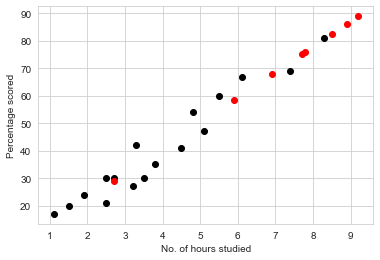

In [36]:
plt.scatter(x_train, y_train, color = "black")
plt.scatter(x_test, y_pred , color = "red")
plt.xlabel("No. of hours studied")
plt.ylabel("Percentage scored")

Text(0, 0.5, 'Percentage scored')

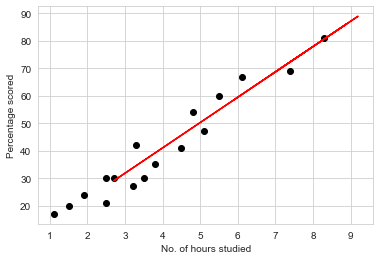

In [37]:
plt.scatter(x_train, y_train, color = "black")
plt.plot(x_test, y_pred , color = "red")
plt.xlabel("No. of hours studied")
plt.ylabel("Percentage scored")

In [38]:
y_test

array([86, 25, 95, 76, 88, 75, 85, 62], dtype=int64)

# Comparing Actual vs Predicted

In [39]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,86,76.040000
1,25,29.072850
2,95,86.170170
3,76,67.751680
4,88,88.932943
5,75,82.486472
6,85,75.119076
7,62,58.542435


# Predicting the score of 9.25 hours

In [43]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])

#own_pred = regressor.predict([[hours]])

#own_pred = regressor.predict(np.array([9.25]).reshape(1, 1))

print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 89.39340573461249


# Evaluating the Model

In [44]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Absolute Error: ', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print("")
print('Mean Squared Error: ', 
      mean_squared_error(y_test, y_pred))
print("")
print('Root Mean Squared Error: ',
     np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  6.6086131472099385

Mean Squared Error:  53.53693170768892

Root Mean Squared Error:  7.316893583187398
